In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd


In [10]:
# Import des fichiers CSV
naive_bayes_path = "naive_bayes_results.csv"
bert_path = "hyperparameters_results.csv"

df_naive_bayes = pd.read_csv(naive_bayes_path, index_col=0)
df_bert = pd.read_csv(bert_path, index_col=0)


## Premier graphique :
### Comparaison des modèles

In [11]:
# Extraction des valeurs pour la comparaison des modèles
test_acc_naive_bayes = float(df_naive_bayes.loc["test_acc", "valeurs_1"])
test_f1_naive_bayes = float(df_naive_bayes.loc["test_f1_score", "valeurs_1"])
test_acc_bert_no_desc = float(df_bert.loc["test_acc", "valeurs_6"])
test_f1_bert_no_desc = float(df_bert.loc["test_f1_score", "valeurs_6"])
test_acc_bert_desc = float(df_bert.loc["test_acc", "valeurs_4"])
test_f1_bert_desc = float(df_bert.loc["test_f1_score", "valeurs_4"])

# Catégories des mesures
models = ["Naive Bayes on caption", "Bert on caption", "Bert on (caption + BLIP)"]
metrics = ["Accuracy", "F1-score"]

# Valeurs
values = [
    [test_acc_naive_bayes, test_f1_naive_bayes],
    [test_acc_bert_no_desc, test_f1_bert_no_desc],
    [test_acc_bert_desc, test_f1_bert_desc]
]

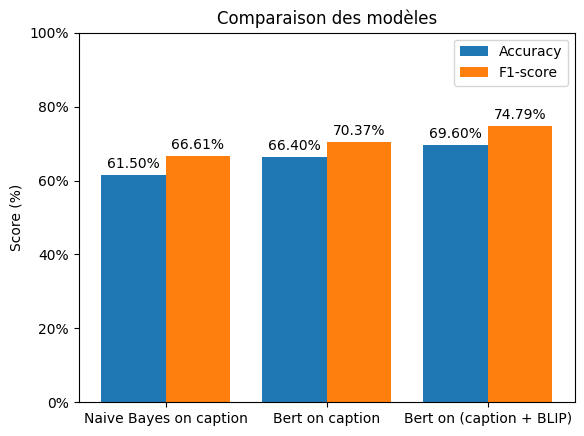

In [12]:
# Position des barres
x = np.arange(len(models))
width = 0.4  # Largeur des barres

# Création de la figure et des axes
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [v[0] for v in values], width, label="Accuracy")
rects2 = ax.bar(x + width/2, [v[1] for v in values], width, label="F1-score")

ax.set_ylim(0, 1)  # L"axe Y va de 0 à 1 (100%)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1))  # Affichage en pourcentage

# Labels et titre
ax.set_ylabel("Score (%)")
ax.set_title("Comparaison des modèles")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Affichage des valeurs au-dessus des barres
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.2%}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Décalage vertical
                    textcoords="offset points",
                    ha="center", va="bottom")

plt.show()
fig.savefig("comparaison_modeles.png", dpi=300, bbox_inches="tight")

# Deuxième graphique :
## Comparaison des hyperparamètres

In [4]:
# Extraction des valeurs pour la comparaison des hyperparamètres
test_acc_1 = float(df_bert.loc["test_acc", "valeurs_1"])
test_f1_1 = float(df_bert.loc["test_f1_score", "valeurs_1"])
test_acc_2 = float(df_bert.loc["test_acc", "valeurs_2"])
test_f1_2 = float(df_bert.loc["test_f1_score", "valeurs_2"])
test_acc_3 = float(df_bert.loc["test_acc", "valeurs_3"])
test_f1_3 = float(df_bert.loc["test_f1_score", "valeurs_3"])
test_acc_4 = float(df_bert.loc["test_acc", "valeurs_4"])
test_f1_4 = float(df_bert.loc["test_f1_score", "valeurs_4"])
test_acc_5 = float(df_bert.loc["test_acc", "valeurs_5"])
test_f1_5 = float(df_bert.loc["test_f1_score", "valeurs_5"])

# Catégories des mesures
models = ["\n0.1\n0.2\n1",
          "\n0.3\n0.4\n1",
          "\n0.5\n0.6\n1",
          "\n0.3\n0.4\n3",
          "\n0.3\n0.4\n6"
          ]

metrics = ["Accuracy", "F1-score"]

# Valeurs
values = [
    [test_acc_1, test_f1_1],
    [test_acc_2, test_f1_2],
    [test_acc_3, test_f1_3],
    [test_acc_4, test_f1_4],
    [test_acc_5, test_f1_5],
]


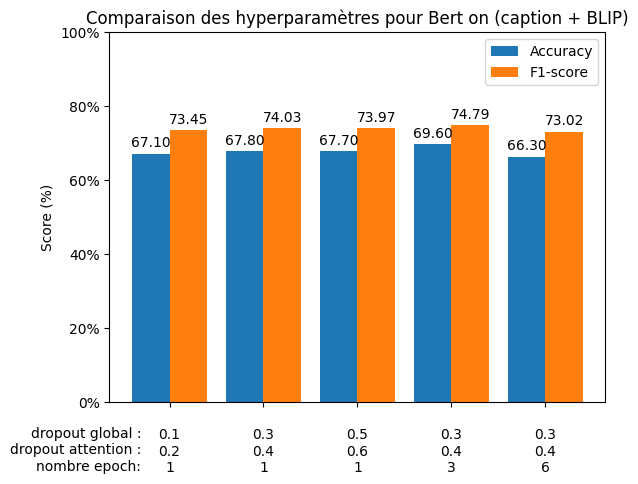

In [6]:
# Position des barres
x = np.arange(len(models))
width = 0.4  # Largeur des barres

# Création de la figure et des axes
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [v[0] for v in values], width, label="Accuracy")
rects2 = ax.bar(x + width/2, [v[1] for v in values], width, label="F1-score")

ax.set_ylim(0, 1)  # Plage fixe pour l'axe y
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1))  # Affichage en pourcentage

# Labels et titre
ax.set_ylabel("Score (%)")
ax.set_title("Comparaison des hyperparamètres pour Bert on (caption + BLIP)")
ax.annotate("dropout global :\n"
            "dropout attention :\n"
            "nombre epoch:", xy=(-0.5, 0), xytext=(-0.3, -0.13), ha="right", va="center", fontsize=10)

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Affichage des valeurs au-dessus des barres
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        text = height * 100
        ax.annotate(f"{text:.2f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Décalage vertical
                    textcoords="offset points",
                    ha="center", va="bottom")

plt.show()
fig.savefig("comparaison_hyperparametres.png", dpi=300, bbox_inches="tight")